In [ ]:
!pip install syft



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 593.7/593.7 kB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

Federated Learning

100%|██████████| 9912422/9912422 [00:00<00:00, 77363258.23it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 21751785.57it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 17850916.68it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14443160.55it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



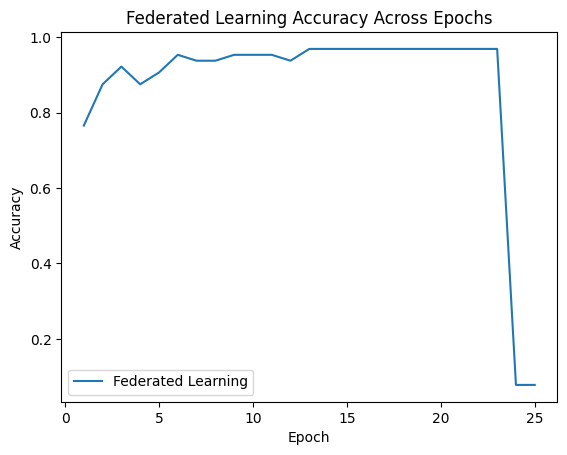

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2290: FutureWarning: The default value of batch_size will change from 3 to 256 in 1.3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2290: FutureWarning: The default value of batch_size will change from 3 to 256 in 1.3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/pyt

Final Accuracy after Federated Dictionary Learning with Genetic Algorithm and Dictionary Learning on Non-IID Data (3 Clients): 0.078125


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.506e-01, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:678: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 21 iterations, alpha=8.168e-02, previous alpha=7.990e-02, with an active set of 14 regressors.
  warnings.warn(


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Define the model and optimizer
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(14 * 14 * 32, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

def learn_local_dictionary(client_data, num_components=100, alpha=1, num_iterations=10):
    patches = []

    # Extract patches from images
    for idx in range(len(client_data)):
        img, _ = client_data[idx]
        patches.append(extract_patches_2d(img.numpy().reshape(28, 28), (5, 5)))

    patches = np.array(patches).reshape(-1, 5 * 5)

    # Initialize the dictionary learning algorithm
    dictionary_learner = MiniBatchDictionaryLearning(n_components=num_components, alpha=alpha, n_iter=num_iterations)

    # Learn the local dictionary
    learned_dictionary = dictionary_learner.fit(patches).components_

    return torch.tensor(learned_dictionary, dtype=torch.float32)

def federated_learning(clients_data, global_model, num_epochs=5, learning_rate=1):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(global_model.parameters(), lr=learning_rate)

    federated_accuracies = []

    for epoch in range(num_epochs):
        for client_data in clients_data:
            local_model = CNNModel()
            local_model.load_state_dict(global_model.state_dict())
            local_optimizer = optim.SGD(local_model.parameters(), lr=learning_rate)

            for data, target in torch.utils.data.DataLoader(client_data, batch_size=32, shuffle=True):
                local_optimizer.zero_grad()
                output = local_model(data)
                loss = criterion(output, target)
                loss.backward()
                local_optimizer.step()

            for global_param, local_param in zip(global_model.parameters(), local_model.parameters()):
                global_param.data += local_param.data

        for global_param in global_model.parameters():
            global_param.data /= len(clients_data)

        global_model.eval()
        with torch.no_grad():
            predictions = global_model(X_val)
        federated_accuracy = accuracy_score(y_val, torch.argmax(predictions, dim=1))
        federated_accuracies.append(federated_accuracy)

    return global_model, federated_accuracies



# Define a function to create non-IID data
def create_non_iid_data(data, num_clients):
    class_groups = [[] for _ in range(10)]
    for i in range(len(data)):
        _, label = data[i]
        class_groups[label].append(i)

    clients_data = [[] for _ in range(num_clients)]
    for i in range(num_clients):
        selected_classes = np.random.choice(10, size=5, replace=False)
        for class_label in selected_classes:
            clients_data[i].extend(class_groups[class_label])

    return [torch.utils.data.Subset(data, indices) for indices in clients_data]
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_train = datasets.MNIST('./data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST('./data', train=False, download=True, transform=transform)

# Split the data into train and test sets
train_size = int(0.05 * len(mnist_train))
test_size = len(mnist_train) - train_size
mnist_train, mnist_val = torch.utils.data.random_split(mnist_train, [train_size, test_size])

# Split the data into train, validation, and test sets
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(mnist_val, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=64, shuffle=False)

# Extract a batch for validation
X_val, y_val = next(iter(val_loader))

# Apply federated learning
num_clients = 5
clients_data = create_non_iid_data(mnist_train, num_clients)



num_epochs_federated = 25
global_model = CNNModel()
global_model, federated_accuracies = federated_learning(clients_data, global_model, num_epochs=num_epochs_federated, learning_rate=0.01)

# Plot the federated learning accuracy
plt.plot(range(1, num_epochs_federated + 1), federated_accuracies, label='Federated Learning')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Federated Learning Accuracy Across Epochs')
plt.legend()
plt.show()

# Learn local dictionaries for each client
local_dictionaries = []
for client_data in clients_data:
    local_dict = learn_local_dictionary(client_data, num_components=100, alpha=1, num_iterations=10)
    local_dictionaries.append(local_dict)

# Aggregate local dictionaries to compute a global dictionary
global_dictionary = torch.mean(torch.stack(local_dictionaries), dim=0)

# Use the global dictionary to update the model
linear_layer = torch.nn.Linear(100 * 25, 32 * 1 * 3 * 3)
reshaped_global_dictionary = global_dictionary.view(1, -1)
reshaped_global_dictionary = linear_layer(reshaped_global_dictionary)
reshaped_global_dictionary = reshaped_global_dictionary.view(32, 1, 3, 3)
global_model.conv1.weight.data = reshaped_global_dictionary

# Evaluate the final model
global_model.eval()
with torch.no_grad():
    predictions = global_model(X_val)

final_accuracy = accuracy_score(y_val, torch.argmax(predictions, dim=1))
print(f"Final Accuracy after Federated Dictionary Learning with Genetic Algorithm and Dictionary Learning on Non-IID Data (3 Clients): {final_accuracy}")


Federated Dictionary Learning

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2290: FutureWarning: The default value of batch_size will change from 3 to 256 in 1.3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2290: FutureWarning: The default value of batch_size will change from 3 to 256 in 1.3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/pyt

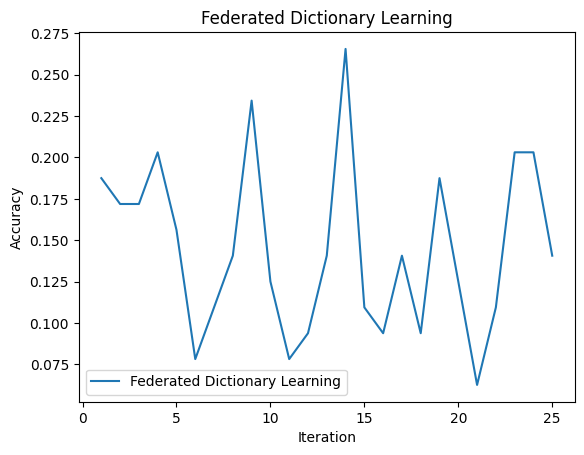

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Define the model and optimizer
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(14 * 14 * 32, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

def learn_local_dictionary(client_data, num_components=100, alpha=1, num_iterations=10):
    patches = []

    # Extract patches from images
    for idx in range(len(client_data)):
        img, _ = client_data[idx]
        patches.append(extract_patches_2d(img.numpy().reshape(28, 28), (5, 5)))

    patches = np.array(patches).reshape(-1, 5 * 5)

    # Initialize the dictionary learning algorithm
    dictionary_learner = MiniBatchDictionaryLearning(n_components=num_components, alpha=alpha, n_iter=num_iterations)

    # Learn the local dictionary
    learned_dictionary = dictionary_learner.fit(patches).components_

    return torch.tensor(learned_dictionary, dtype=torch.float32)

def federated_dictionary_learning(clients_data, global_model, num_epochs=5, learning_rate=1):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(global_model.parameters(), lr=learning_rate)

    federated_accuracies = []

    for epoch in range(num_epochs):
        local_dictionaries = []  # Local dictionaries for each client

        for client_data in clients_data:
            local_model = CNNModel()
            local_model.load_state_dict(global_model.state_dict())
            local_optimizer = optim.SGD(local_model.parameters(), lr=learning_rate)

            # Perform local training
            for data, target in torch.utils.data.DataLoader(client_data, batch_size=32, shuffle=True):
                local_optimizer.zero_grad()
                output = local_model(data)
                loss = criterion(output, target)
                loss.backward()
                local_optimizer.step()

            # Learn local dictionary
            local_dict = learn_local_dictionary(client_data, num_components=100, alpha=1, num_iterations=10)
            local_dictionaries.append(local_dict)

        # Exchange local dictionaries
        global_dictionary = torch.mean(torch.stack(local_dictionaries), dim=0)

        for i, client_data in enumerate(clients_data):
            reshaped_global_dictionary = global_dictionary.view(1, -1)
            reshaped_global_dictionary = linear_layer[i](reshaped_global_dictionary)
            reshaped_global_dictionary = reshaped_global_dictionary.view(32, 1, 3, 3)
            local_model = CNNModel()
            local_model.load_state_dict(global_model.state_dict())
            local_model.conv1.weight.data = reshaped_global_dictionary
            local_model.eval()

            # Evaluate the global model
            with torch.no_grad():
                predictions = local_model(X_val)
            federated_accuracy = accuracy_score(y_val, torch.argmax(predictions, dim=1))
            federated_accuracies.append(federated_accuracy)

    return global_model, federated_accuracies

# Define a function to create non-IID data
def create_non_iid_data(data, num_clients):
    class_groups = [[] for _ in range(10)]
    for i in range(len(data)):
        _, label = data[i]
        class_groups[label].append(i)

    clients_data = [[] for _ in range(num_clients)]
    for i in range(num_clients):
        selected_classes = np.random.choice(10, size=5, replace=False)
        for class_label in selected_classes:
            clients_data[i].extend(class_groups[class_label])

    return [torch.utils.data.Subset(data, indices) for indices in clients_data]
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_train = datasets.MNIST('./data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST('./data', train=False, download=True, transform=transform)

# Split the data into train and test sets
train_size = int(0.05 * len(mnist_train))
test_size = len(mnist_train) - train_size
mnist_train, mnist_val = torch.utils.data.random_split(mnist_train, [train_size, test_size])

# Split the data into train, validation, and test sets
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(mnist_val, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=64, shuffle=False)

# Extract a batch for validation
X_val, y_val = next(iter(val_loader))

# Apply federated learning
num_clients = 5
clients_data = create_non_iid_data(mnist_train, num_clients)

# Apply federated dictionary learning
num_epochs_federated = 5
global_model = CNNModel()
linear_layer = nn.ModuleList([torch.nn.Linear(100 * 25, 32 * 1 * 3 * 3) for _ in range(len(clients_data))])
global_model, federated_accuracies = federated_dictionary_learning(clients_data, global_model, num_epochs=num_epochs_federated, learning_rate=0.01)

# Plot the federated dictionary learning accuracy
plt.plot(range(1, len(federated_accuracies) + 1), federated_accuracies, label='Federated Dictionary Learning')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Federated Dictionary Learning')
plt.legend()
plt.show()




Progressive Federated Dictionary Learning


Files already downloaded and verified

Training on Device 1/5
Epoch 1/5, Loss: 0.1392, Accuracy: 0.1537
Epoch 2/5, Loss: 0.0333, Accuracy: 0.2305
Epoch 3/5, Loss: 0.0320, Accuracy: 0.2689
Epoch 4/5, Loss: 0.0301, Accuracy: 0.3140
Epoch 5/5, Loss: 0.0280, Accuracy: 0.3609

Training on Device 2/5
Epoch 1/5, Loss: 0.0278, Accuracy: 0.3644
Epoch 2/5, Loss: 0.0253, Accuracy: 0.4248
Epoch 3/5, Loss: 0.0234, Accuracy: 0.4711
Epoch 4/5, Loss: 0.0218, Accuracy: 0.5108
Epoch 5/5, Loss: 0.0204, Accuracy: 0.5450

Training on Device 3/5
Epoch 1/5, Loss: 0.0229, Accuracy: 0.4866
Epoch 2/5, Loss: 0.0209, Accuracy: 0.5362
Epoch 3/5, Loss: 0.0195, Accuracy: 0.5608
Epoch 4/5, Loss: 0.0183, Accuracy: 0.5884
Epoch 5/5, Loss: 0.0166, Accuracy: 0.6263

Training on Device 4/5
Epoch 1/5, Loss: 0.0210, Accuracy: 0.5413
Epoch 2/5, Loss: 0.0184, Accuracy: 0.5890
Epoch 3/5, Loss: 0.0165, Accuracy: 0.6351
Epoch 4/5, Loss: 0.0151, Accuracy: 0.6715
Epoch 5/5, Loss: 0.0134, Accuracy: 0.7051

Training on Device 5/5
Ep

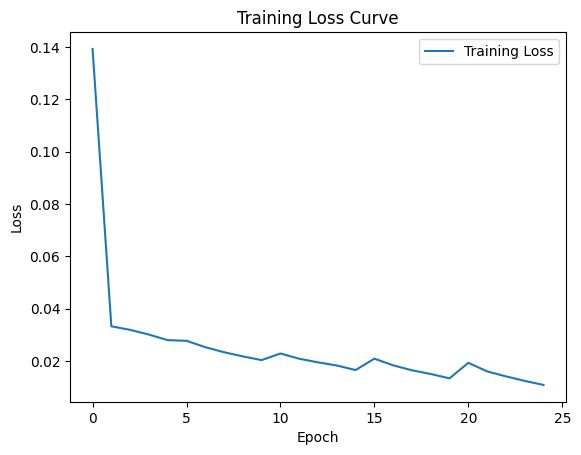

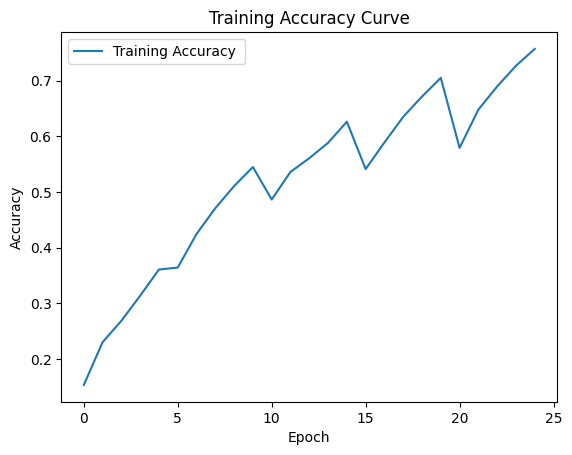

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
import syft as sy
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Set random seed for reproducibility
torch.manual_seed(123)

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 6 * 6, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the CIFAR-10 dataset
class FederatedDataset(Dataset):
    def __init__(self, data, targets):
        self.data = torch.tensor(data, dtype=torch.float32).permute(0, 3, 1, 2)  # Permute dimensions
        self.targets = torch.tensor(targets, dtype=torch.long)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index], self.targets[index]

# Function to create federated datasets with curriculum learning
def create_curriculum_federated_datasets(train_data, train_targets, num_devices, num_classes):
    federated_datasets = []

    # Calculate data per device
    data_per_device = len(train_data) // num_devices

    for i in range(num_devices):
        # Generate a curriculum based on the class difficulty (easier classes first)
        curriculum = np.random.choice(num_classes, size=data_per_device, replace=True)
        device_data, device_targets = [], []

        for cur_class in curriculum:
            class_indices = np.where(train_targets == cur_class)[0]
            selected_index = np.random.choice(class_indices)
            device_data.append(train_data[selected_index])
            device_targets.append(train_targets[selected_index])

        federated_datasets.append(FederatedDataset(device_data, device_targets))

    return federated_datasets

# Function to train a model on a federated dataset
def federated_train(model, federated_train_data, num_epochs, device, lr=0.01, grad_clip=None):
    model = model.to(device)
    model.train()

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    if grad_clip is not None:
        clip_value = grad_clip
        for p in model.parameters():
            p.register_hook(lambda grad: torch.clamp(grad, -clip_value, clip_value))

    train_losses = []
    train_accuracies = []

    for epoch in range(num_epochs):
        total_loss = 0.0
        correct_predictions = 0
        total_samples = 0

        for data, target in DataLoader(federated_train_data, batch_size=64, shuffle=True):
            data, target = data.to(device), target.to(device)

            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

            _, predicted = torch.max(output, 1)
            correct_predictions += (predicted == target).sum().item()
            total_samples += target.size(0)

        accuracy = correct_predictions / total_samples
        average_loss = total_loss / len(federated_train_data)

        train_accuracies.append(accuracy)
        train_losses.append(average_loss)

        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}")

    return train_losses, train_accuracies

# Function to learn local dictionary
def learn_local_dictionary(client_data, num_components=100, alpha=1, num_iterations=10):
    patches = []

    # Extract patches from images
    for idx in range(len(client_data)):
        img, _ = client_data[idx]
        patches.append(extract_patches_2d(img.numpy().reshape(32, 32, 3), (5, 5, 3)))

    patches = np.array(patches).reshape(-1, 5 * 5 * 3)

    # Initialize the dictionary learning algorithm
    dictionary_learner = MiniBatchDictionaryLearning(n_components=num_components, alpha=alpha, n_iter=num_iterations)

    # Learn the local dictionary
    learned_dictionary = dictionary_learner.fit(patches).components_

    return torch.tensor(learned_dictionary, dtype=torch.float32)

# Function for federated dictionary learning
def federated_dictionary_learning(clients_data, global_model, num_epochs=5, learning_rate=1):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(global_model.parameters(), lr=learning_rate)

    federated_accuracies = []

    for epoch in range(num_epochs):
        local_dictionaries = []  # Local dictionaries for each client

        for client_data in clients_data:
            local_model = Net()
            local_model.load_state_dict(global_model.state_dict())
            local_optimizer = optim.SGD(local_model.parameters(), lr=learning_rate)

            # Perform local training
            for data, target in torch.utils.data.DataLoader(client_data, batch_size=32, shuffle=True):
                local_optimizer.zero_grad()
                output = local_model(data)
                loss = criterion(output, target)
                loss.backward()
                local_optimizer.step()

            # Learn local dictionary
            local_dict = learn_local_dictionary(client_data, num_components=100, alpha=1, num_iterations=10)
            local_dictionaries.append(local_dict)

        # Exchange local dictionaries
        global_dictionary = torch.mean(torch.stack(local_dictionaries), dim=0)

        for i, client_data in enumerate(clients_data):
            # Fix reshaping issue
            reshaped_global_dictionary = global_dictionary.view(100, 3, 5, 5)
            local_model = Net()
            local_model.load_state_dict(global_model.state_dict())
            local_model.conv1.weight.data = reshaped_global_dictionary
            local_model.eval()

            # Evaluate the global model
            with torch.no_grad():
                predictions = local_model(X_val)
            federated_accuracy = accuracy_score(y_val, torch.argmax(predictions, dim=1))
            federated_accuracies.append(federated_accuracy)

    return global_model, federated_accuracies

# Load CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_data = train_dataset.data
train_targets = train_dataset.targets
num_classes = len(set(train_targets))

# Create federated datasets with curriculum learning
num_devices = 5
federated_datasets = create_curriculum_federated_datasets(train_data, train_targets, num_devices, num_classes)

# Initialize the model
model = Net()

# Train the model on federated datasets with curriculum learning
train_losses = []
train_accuracies = []

for i in range(num_devices):
    print(f"\nTraining on Device {i + 1}/{num_devices}")
    losses, accuracies = federated_train(model, federated_datasets[i], num_epochs=5, device=torch.device("cuda" if torch.cuda.is_available() else "cpu"), lr=0.01, grad_clip=5.0)
    train_losses.append(losses)
    train_accuracies.append(accuracies)

# Flatten the lists for plotting
train_losses_flat = [item for sublist in train_losses for item in sublist]
train_accuracies_flat = [item for sublist in train_accuracies for item in sublist]

# Plot accuracy and loss curves after federated learning
def plot_curve(data, label, title, ylabel):
    plt.plot(data, label=label)
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

plot_curve(train_losses_flat, "Training Loss", "Training Loss Curve", "Loss")
plot_curve(train_accuracies_flat, "Training Accuracy ", "Training Accuracy Curve", "Accuracy")

